In [3]:
%pip install 'scipy>=1.8'
%pip install 'networkx<2.7'
%pip install igraph
%pip install pandas 
%pip install infomap


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
from tqdm import tqdm

from matplotlib import pyplot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# ML models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

from collections import Counter

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Speed up hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import networkx as nx
import infomap


In [4]:
# PATH = './kaggle/input/healthcare-provider-fraud-detection-analysis/'
PATH = './'



In [5]:
inpatients = pd.read_csv(PATH + 'Train_Inpatientdata-1542865627584.csv')
outpatients = pd.read_csv(PATH + 'Train_Outpatientdata-1542865627584.csv')
beneficiaries = pd.read_csv(PATH + 'Train_Beneficiarydata-1542865627584.csv')

labels = pd.read_csv(PATH + 'Train-1542865627584.csv')


In [6]:
inpatients.head()


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
labels.head()


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [8]:
inpatients.columns


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [9]:
outpatients.columns


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [10]:
beneficiaries.head()


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [11]:
beneficiaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [12]:
beneficiaries.columns


Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [13]:
labels.columns


Index(['Provider', 'PotentialFraud'], dtype='object')

In [14]:
df1 = inpatients[['BeneID', 'ClaimID', 'Provider',
                  'InscClaimAmtReimbursed', 'AttendingPhysician', 'DeductibleAmtPaid']]
df2 = outpatients[['BeneID', 'ClaimID', 'Provider',
                   'InscClaimAmtReimbursed', 'AttendingPhysician', 'DeductibleAmtPaid']]
df3 = beneficiaries[['BeneID', 'Gender', 'Race', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                     'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]


df = pd.concat([df1, df2])

df = df.set_index('Provider').join(labels.set_index('Provider')).reset_index(
).set_index('BeneID').join(df3.set_index('BeneID')).reset_index()

df['PotentialFraud'] = df['PotentialFraud'].replace(
    "No", 0).replace("Yes", 1).astype(int)

df.head()


,BeneID,Provider,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,PotentialFraud,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE100000,PRV57172,CLM126832,50,PHY383401,0.0,1,1,1,12,12,0,0,120,30
1,BENE100000,PRV57172,CLM351838,70,PHY370909,0.0,1,1,1,12,12,0,0,120,30
2,BENE100001,PRV52145,CLM626521,10,PHY430032,0.0,0,1,1,12,12,0,0,2530,540
3,BENE100001,PRV54683,CLM633318,100,PHY408282,0.0,0,1,1,12,12,0,0,2530,540
4,BENE100001,PRV54890,CLM332544,90,PHY343317,0.0,0,1,1,12,12,0,0,2530,540


In [15]:
# Providers: start with 1
#AttendingPhysician: starts with 2


In [16]:
df['AttendingPhysician'].str.removeprefix("PHY").astype(float).min()


311001.0

In [17]:
df['Provider'] = df['Provider'].str.removeprefix("PRV").astype(int) + 1_000_000
df['AttendingPhysician'] = df['AttendingPhysician'].str.removeprefix(
    "PHY").fillna(0).astype(int) + 2_000_000
df['BeneID'] = df['BeneID'].str.removeprefix(
    "BENE").fillna(0).astype(int) + 3_000_000

df


,BeneID,Provider,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,PotentialFraud,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,3100000,1057172,CLM126832,50,2383401,0.0,1,1,1,12,12,0,0,120,30
1,3100000,1057172,CLM351838,70,2370909,0.0,1,1,1,12,12,0,0,120,30
2,3100001,1052145,CLM626521,10,2430032,0.0,0,1,1,12,12,0,0,2530,540
3,3100001,1054683,CLM633318,100,2408282,0.0,0,1,1,12,12,0,0,2530,540
4,3100001,1054890,CLM332544,90,2343317,0.0,0,1,1,12,12,0,0,2530,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,3099999,1054670,CLM475422,80,2351000,0.0,0,2,1,12,12,0,0,1270,690
558207,3099999,1054670,CLM750563,50,2359641,0.0,0,2,1,12,12,0,0,1270,690
558208,3099999,1055510,CLM187739,60,2318212,0.0,0,2,1,12,12,0,0,1270,690
558209,3099999,1055826,CLM359214,80,2341548,0.0,0,2,1,12,12,0,0,1270,690


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BeneID                    558211 non-null  int64  
 1   Provider                  558211 non-null  int64  
 2   ClaimID                   558211 non-null  object 
 3   InscClaimAmtReimbursed    558211 non-null  int64  
 4   AttendingPhysician        558211 non-null  int64  
 5   DeductibleAmtPaid         557312 non-null  float64
 6   PotentialFraud            558211 non-null  int64  
 7   Gender                    558211 non-null  int64  
 8   Race                      558211 non-null  int64  
 9   NoOfMonths_PartACov       558211 non-null  int64  
 10  NoOfMonths_PartBCov       558211 non-null  int64  
 11  IPAnnualReimbursementAmt  558211 non-null  int64  
 12  IPAnnualDeductibleAmt     558211 non-null  int64  
 13  OPAnnualReimbursementAmt  558211 non-null  i

In [19]:
df.head()


,BeneID,Provider,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,PotentialFraud,Gender,Race,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,3100000,1057172,CLM126832,50,2383401,0.0,1,1,1,12,12,0,0,120,30
1,3100000,1057172,CLM351838,70,2370909,0.0,1,1,1,12,12,0,0,120,30
2,3100001,1052145,CLM626521,10,2430032,0.0,0,1,1,12,12,0,0,2530,540
3,3100001,1054683,CLM633318,100,2408282,0.0,0,1,1,12,12,0,0,2530,540
4,3100001,1054890,CLM332544,90,2343317,0.0,0,1,1,12,12,0,0,2530,540


In [20]:
#Plotting graph now

In [21]:
df.shape


(558211, 15)

In [22]:
#trying collusion between provider & physician
source = 'Provider'
target = 'BeneID'

G = nx.from_pandas_edgelist(df, source=source, target=target)


In [26]:
import plotly.graph_objs as go

# Consider subgraph for plotting
df_plotting = df.sample(n=1_000, random_state=1)

H = nx.from_pandas_edgelist(df_plotting, source=source, target=target)
pos = nx.random_layout(H)

# Create Edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#010203'),
    hoverinfo='none',
    mode='lines')

for edge in H.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=False,
        color=[],
        size=12,
        colorbar=dict(
            thickness=35,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in H.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# add color to node points
for node, adjacencies in enumerate(H.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0])

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title='<br>Network Graph of Provider & Beneficiary \n\n',
                titlefont=dict(size=16),
                showlegend=False,
                margin=dict(b=20, l=5, r=5, t=40),
                annotations=[dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002)],
                xaxis=dict(showgrid=False, zeroline=False,
                           showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()


In [27]:
# defining a dictionary of graph features
nodes_info_dict = {
    # 'closeness_centrality': nx.closeness_centrality,
    'eigenvector_centrality': nx.eigenvector_centrality_numpy,
    'pagerank': nx.pagerank
}

columns_with_node_infos = ['degree'] + list(nodes_info_dict.keys())

nodes_info = pd.DataFrame.from_dict(dict(nx.degree(G)), orient='index').rename(
    columns={0: 'degree'}).reset_index()

# computing graph features for each node
for info, fun in nodes_info_dict.items():
    temp = pd.DataFrame.from_dict(fun(G), orient='index').rename(columns = {0 : info}).reset_index()
    nodes_info = nodes_info.merge(temp, on='index')

nodes_info = nodes_info.rename(columns = {'index': 'Beneficiary'})

# adding graph features to the dataframe
df_enriched = df.merge(nodes_info, left_on = 'Provider',
                           right_on='Beneficiary', how='left').drop('Beneficiary', axis=1)
df_enriched.rename(columns = {k:'Provider_'+k for k in columns_with_node_infos}, inplace = True)

df_enriched = df_enriched.merge(nodes_info, left_on = 'BeneID',
                           right_on='Beneficiary', how='left').drop('Beneficiary', axis=1)
df_enriched.rename(columns = {k:'Beneficiary_'+k for k in columns_with_node_infos}, inplace = True)

In [28]:
df_enriched.head()


,BeneID,Provider,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,PotentialFraud,Gender,Race,NoOfMonths_PartACov,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Provider_degree,Provider_eigenvector_centrality,Provider_pagerank,Beneficiary_degree,Beneficiary_eigenvector_centrality,Beneficiary_pagerank
0,3100000,1057172,CLM126832,50,2383401,0.0,1,1,1,12,...,0,0,120,30,605,0.003924,0.001010,1,0.000072,0.000003
1,3100000,1057172,CLM351838,70,2370909,0.0,1,1,1,12,...,0,0,120,30,605,0.003924,0.001010,1,0.000072,0.000003
2,3100001,1052145,CLM626521,10,2430032,0.0,0,1,1,12,...,0,0,2530,540,236,0.004727,0.000236,6,0.001527,0.000007
3,3100001,1054683,CLM633318,100,2408282,0.0,0,1,1,12,...,0,0,2530,540,406,0.008217,0.000426,6,0.001527,0.000007
4,3100001,1054890,CLM332544,90,2343317,0.0,0,1,1,12,...,0,0,2530,540,77,0.001722,0.000076,6,0.001527,0.000007


In [29]:
df_enriched.shape


(558211, 21)

In [30]:
# The graph below shows the correlation between the target PotentialFraud and the graph features.


<AxesSubplot:>

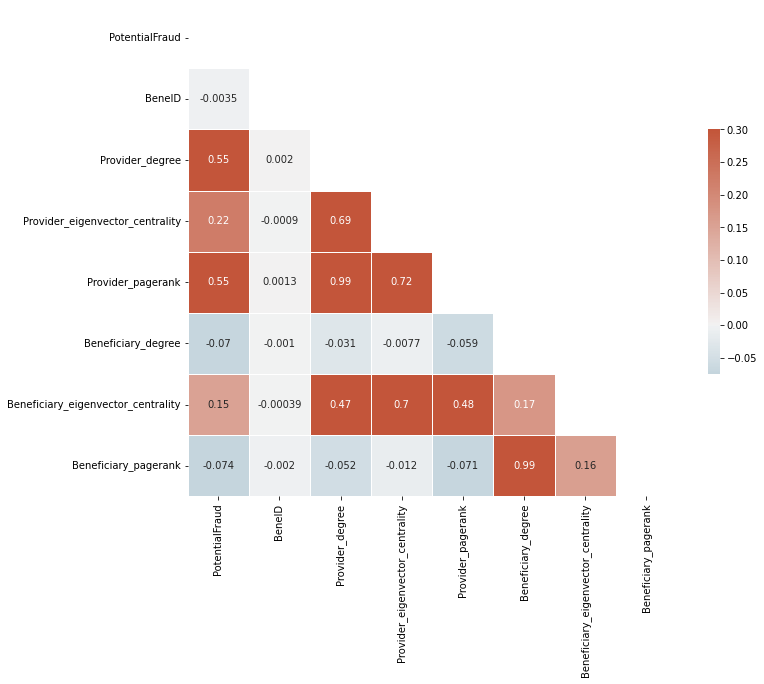

In [31]:
import seaborn as sns

corr_data = df_enriched[['PotentialFraud',
                         'BeneID',
                         'Provider_degree',
                         #                 'Provider_closeness_centrality',
                         'Provider_eigenvector_centrality',
                         'Provider_pagerank',
                         'Beneficiary_degree',
                         #                 'Beneficiary_closeness_centrality',
                         'Beneficiary_eigenvector_centrality',
                         'Beneficiary_pagerank']]

# Compute the correlation matrix
corr = corr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [32]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    im = infomap.Infomap(two_level=True, silent=True)

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        im.addLink(*e)

    print("Find communities with Infomap...")
    im.run()

    print(
        f"Found {im.num_top_modules} modules with codelength {im.codelength:.8f} bits")

    communities = {}
    for node, module in im.modules:
        communities[node] = module

    nx.set_node_attributes(G, communities, 'community')

    return G


def drawNetwork(G):
    # position map
    pos = nx.spectral_layout(I)
    # community ids
    communities = [v for k, v in nx.get_node_attributes(
        I, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(
        ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(
        ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(I, pos)


# Draw nodes
    nodeCollection = nx.draw_networkx_nodes(I,
                                            pos=pos,
                                            node_size=1,
                                            node_color=communities,
                                            cmap=cmapLight
                                            )
    # Set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    plt.axis('off')
    plt.xlim(np.vstack(list(pos.values()))[:, 0].min(
    ) + 0.01, np.vstack(list(pos.values()))[:, 0].max())
    plt.ylim(np.vstack(list(pos.values()))[:, 1].min(
    ), np.vstack(list(pos.values()))[:, 1].max())
    plt.show()


In [33]:
G = findCommunities(G)


Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 1306 modules with codelength 10.48727366 bits


In [34]:
# plotting the communities as a graph


In [35]:
I = G.subgraph(list(H.nodes()))

drawNetwork(I)


KeyboardInterrupt: 

In [36]:
df_communities = pd.DataFrame([[k, v] for k, v in nx.get_node_attributes(
    G, 'community').items()], columns=["BeneID", "Beneficiary_cluster"])
df_communities.head(2)


,BeneID,Beneficiary_cluster
0,1057172,103
1,3100000,103


In [37]:
df_communities.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143966 entries, 0 to 143965
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   BeneID               143966 non-null  int64
 1   Beneficiary_cluster  143966 non-null  int64
dtypes: int64(2)
memory usage: 2.2 MB


In [38]:
df_enriched = df_enriched.set_index('BeneID').join(
    df_communities.set_index('BeneID'), how="left", rsuffix='_comm').reset_index()

df_enriched.head(2)


,BeneID,Provider,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,PotentialFraud,Gender,Race,NoOfMonths_PartACov,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Provider_degree,Provider_eigenvector_centrality,Provider_pagerank,Beneficiary_degree,Beneficiary_eigenvector_centrality,Beneficiary_pagerank,Beneficiary_cluster
0,3011001,1055907,CLM66048,5000,2318495,1068.0,0,1,1,12,...,3204,60,70,204,0.000802,0.000242,3,0.000025,0.000005,605
1,3011001,1055912,CLM46614,26000,2390922,1068.0,1,1,1,12,...,3204,60,70,100,0.000543,0.000120,3,0.000025,0.000005,605


In [39]:
#Setting up training
 #I split the dataset into 2: a training set, 
#representing 80% of the initial dataset, and 
#a validation set. 
#For every scenario, I tested multiple 
#classification algorithms and picked the best one based on the AUC on the training set 
#using a 3-fold cross-validation approach.

In [40]:
df_enriched.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   BeneID                              558211 non-null  int64  
 1   Provider                            558211 non-null  int64  
 2   ClaimID                             558211 non-null  object 
 3   InscClaimAmtReimbursed              558211 non-null  int64  
 4   AttendingPhysician                  558211 non-null  int64  
 5   DeductibleAmtPaid                   557312 non-null  float64
 6   PotentialFraud                      558211 non-null  int64  
 7   Gender                              558211 non-null  int64  
 8   Race                                558211 non-null  int64  
 9   NoOfMonths_PartACov                 558211 non-null  int64  
 10  NoOfMonths_PartBCov                 558211 non-null  int64  
 11  IPAnnualReimbursementAmt  

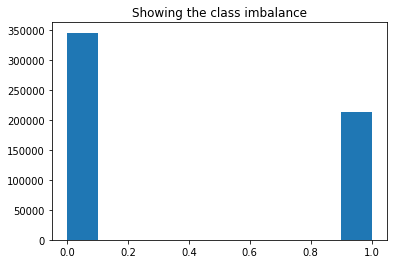

The Class Imbalance: Counter({0: 345415, 1: 212796})


In [41]:
classes = df_enriched['PotentialFraud'].to_numpy()

plt.hist(classes)
plt.title("Showing the class imbalance")
plt.show()

print('The Class Imbalance: %s' % Counter(classes))


In [42]:
df_enriched.head()


,BeneID,Provider,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,PotentialFraud,Gender,Race,NoOfMonths_PartACov,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Provider_degree,Provider_eigenvector_centrality,Provider_pagerank,Beneficiary_degree,Beneficiary_eigenvector_centrality,Beneficiary_pagerank,Beneficiary_cluster
0,3011001,1055907,CLM66048,5000,2318495,1068.0,0,1,1,12,...,3204,60,70,204,0.000802,0.000242,3,2.522186e-05,0.000005,605
1,3011001,1055912,CLM46614,26000,2390922,1068.0,1,1,1,12,...,3204,60,70,100,0.000543,0.000120,3,2.522186e-05,0.000005,605
2,3011001,1056046,CLM68358,5000,2372395,1068.0,0,1,1,12,...,3204,60,70,17,0.000029,0.000022,3,2.522186e-05,0.000005,605
3,3011002,1056011,CLM624349,30,2326117,0.0,1,2,1,12,...,0,30,50,1164,0.005319,0.001547,1,9.765378e-05,0.000002,44
4,3011003,1057595,CLM438021,10,2328821,0.0,0,1,1,12,...,0,90,40,24,0.000006,0.000037,2,3.166882e-07,0.000004,213


In [43]:
df_enriched.columns


Index(['BeneID', 'Provider', 'ClaimID', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'DeductibleAmtPaid', 'PotentialFraud', 'Gender',
       'Race', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Provider_degree',
       'Provider_eigenvector_centrality', 'Provider_pagerank',
       'Beneficiary_degree', 'Beneficiary_eigenvector_centrality',
       'Beneficiary_pagerank', 'Beneficiary_cluster'],
      dtype='object')

In [44]:
# Splitting feature data from label data
X, y = df_enriched[['InscClaimAmtReimbursed',
                    'DeductibleAmtPaid',
                    'Gender',
                    'Race',
                    'NoOfMonths_PartACov',
                    'NoOfMonths_PartBCov',
                    'IPAnnualReimbursementAmt',
                    'IPAnnualDeductibleAmt',
                    'OPAnnualReimbursementAmt',
                    'OPAnnualDeductibleAmt',
                    'Provider_degree',
                    #  'Provider_closeness_centrality',
                    'Provider_eigenvector_centrality',
                    'Provider_pagerank',
                    'Beneficiary_degree',
                    #  'Beneficiary_closeness_centrality',
                    'Beneficiary_eigenvector_centrality',
                    'Beneficiary_pagerank',
                    'Beneficiary_cluster']], df_enriched['PotentialFraud']

print("Original shapes: ", "X:", X.shape, " y:", y.shape)


Original shapes:  X: (558211, 17)  y: (558211,)


In [45]:
X = X.fillna(0)


In [46]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=69)
print(f"Shapes after splitting:\n\nX_train: {X_train.shape}, y_train: {y_train.shape}\
      \nX_test: {X_test.shape}, y_test: {y_test.shape}")


Shapes after splitting:

X_train: (334926, 17), y_train: (334926,)      
X_test: (223285, 17), y_test: (223285,)


In [47]:
#Training a model

In [48]:
accuracy = []
feature_names = ["Baseline", "Graph Features",
                 "Graph Features with Community Detection"]
features = [
    # Baseline features
    ['InscClaimAmtReimbursed',
     'DeductibleAmtPaid',
     'Gender',
     'Race',
     'NoOfMonths_PartACov',
     'NoOfMonths_PartBCov',
     'IPAnnualReimbursementAmt',
     'IPAnnualDeductibleAmt',
     'OPAnnualReimbursementAmt',
     'OPAnnualDeductibleAmt'],
    # # Baseline + Graph Features
    ['InscClaimAmtReimbursed',
     'DeductibleAmtPaid',
     'Gender',
     'Race',
     'NoOfMonths_PartACov',
     'NoOfMonths_PartBCov',
     'IPAnnualReimbursementAmt',
     'IPAnnualDeductibleAmt',
     'OPAnnualReimbursementAmt',
     'OPAnnualDeductibleAmt',
     'Provider_degree',
     #  'Provider_closeness_centrality',
     'Provider_eigenvector_centrality',
     'Provider_pagerank',
     'Beneficiary_degree',
     #  'Beneficiary_closeness_centrality',
     'Beneficiary_eigenvector_centrality',
     'Beneficiary_pagerank'],
    # # Baseline + Graph Features + Community Detection
    ['InscClaimAmtReimbursed',
     'DeductibleAmtPaid',
     'Gender',
     'Race',
     'NoOfMonths_PartACov',
     'NoOfMonths_PartBCov',
     'IPAnnualReimbursementAmt',
     'IPAnnualDeductibleAmt',
     'OPAnnualReimbursementAmt',
     'OPAnnualDeductibleAmt',
     'Provider_degree',
     #  'Provider_closeness_centrality',
     'Provider_eigenvector_centrality',
     'Provider_pagerank',
     'Beneficiary_degree',
     #  'AttendingPhysician_closeness_centrality',
     'Beneficiary_eigenvector_centrality',
     'Beneficiary_pagerank',
     'Beneficiary_cluster']
]

hyper_parameter_grids_RFC = [
    {  # Grid 1: No regularization
        "randomforestclassifier__criterion": ['gini'],
        "randomforestclassifier__max_depth": [10, 20, 50, 100, 250, 300, 500],
        "randomforestclassifier__min_samples_split": [2, 3, 5, 10, 20, 30],
    },
    {  # Grid 2: L2 regularization
        "randomforestclassifier__criterion": ['entropy'],
        "randomforestclassifier__max_depth": [10, 20, 50, 100, 250, 300, 500],
        "randomforestclassifier__min_samples_split": [2, 3, 5, 10, 20, 30],

    },
]
pipeline_RFC = make_pipeline(
    StandardScaler(), RandomForestClassifier(random_state=69))


for feature in features:
    print("*" * 100)
    print("# Tuning hyper-parameters for accuracy")
    print("*" * 100)
    print()

    # This performs gridsearch, evaluating each set of hyper-parameters using k-fold
    # cross validation.
    clf = HalvingGridSearchCV(
        pipeline_RFC, hyper_parameter_grids_RFC, scoring="accuracy", cv=4, n_jobs=-1)

    X_train_subset = X_train[feature]
    X_test_subset = X_test[feature]

    clf.fit(X_train_subset, y_train)

    acc = round(clf.best_estimator_.score(X_test_subset, y_test) * 100, 2)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Best score on development set:")
    print()

    print(f"Accuracy: {acc}")
    accuracy.append(acc)

****************************************************************************************************
# Tuning hyper-parameters for accuracy
****************************************************************************************************

Best parameters set found on development set:

{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 5}

Best score on development set:

Accuracy: 63.08
****************************************************************************************************
# Tuning hyper-parameters for accuracy
****************************************************************************************************

Best parameters set found on development set:

{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 250, 'randomforestclassifier__min_samples_split': 3}

Best score on development set:

Accuracy: 98.96
***********************************************

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best parameters set found on development set:

{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__min_samples_split': 3}

Best score on development set:

Accuracy: 98.89


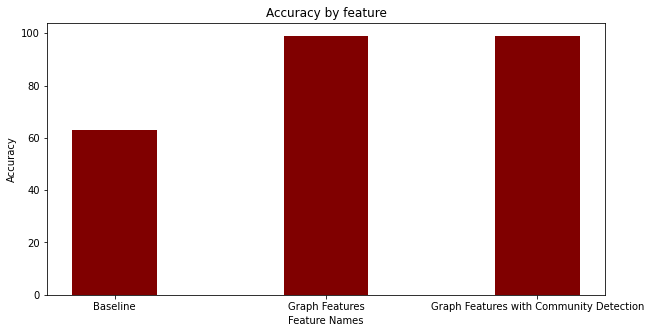

In [49]:
fig = plt.figure(figsize = (10, 5))


# creating the bar plot
plt.bar(feature_names, accuracy, color ='maroon',
        width = 0.4)

plt.xlabel("Feature Names")
plt.ylabel("Accuracy")
plt.title("Accuracy by feature")
plt.show()

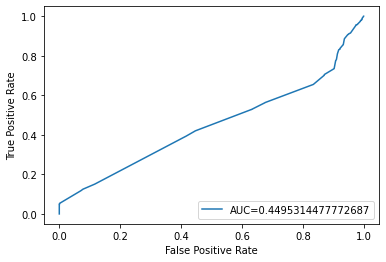

In [50]:
from sklearn import metrics

#define metrics
y_pred_proba = clf.best_estimator_.steps[1][1].predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [51]:
### import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, precision_recall_curve, average_precision_score 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline
plt.style.use('ggplot')